## Example notebook for the AutoML pipeline
Load the data with one of the three imported datasets before running the AutoML function. These datasets are provided by sklearn and are very small and easy to learn. You can learn more about these datasets at https://scikit-learn.org/stable/datasets/index.html.
    
    load_breast_cancer: binary classification
    load_wine: multi-class classification
    load_boston: regression

Note: make sure automl.py is located in the same directory as the notebook!

In [1]:
# Import packages
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston, load_wine, load_breast_cancer
from automl import AutoML

In [2]:
# Load the data as pandas dataframes
x = load_breast_cancer()

data = np.c_[x.data, x.target]
columns = np.append(x.feature_names, ["target"])
data = pd.DataFrame(data, columns=columns)
X = data.drop('target', axis=1)
Y = data['target']

In [3]:
# Load the data as numpy arrays
#X, Y = load_breast_cancer(return_X_y=True)

Algorithm set to binary classification.
Linear Regression can't solve classification problems. Removing model from pipeline.
Models in pipeline: ['LogReg', 'LDA', 'KNN', 'Tree', 'ET', 'RF', 'AdaBoost', 'GBM', 'XGBoost', 'SVM', 'MLP']

Data stats =====================>
Number of features: 30
Total number of instances: 569
Size of the training set: 426
Size of the validation set: 143


Final stats ================>>
Target metric: F1
------------------------------------
Logistic Regression          --> Mean: 0.983   Std: 0.005
Linear Discriminant Analysis --> Mean: 0.966   Std: 0.008
K-Nearest Neighbors          --> Mean: 0.944   Std: 0.015
Decision Tree                --> Mean: 0.934   Std: 0.020
Extremely Randomized Trees   --> Mean: 0.961   Std: 0.014
Random Forest                --> Mean: 0.968   Std: 0.023
Adaptive Boosting            --> Mean: 0.979   Std: 0.012
Gradient Boosting Machine    --> Mean: 0.965   Std: 0.023
Extreme Gradient Boosting    --> Mean: 0.969   Std: 0.020
Suppo

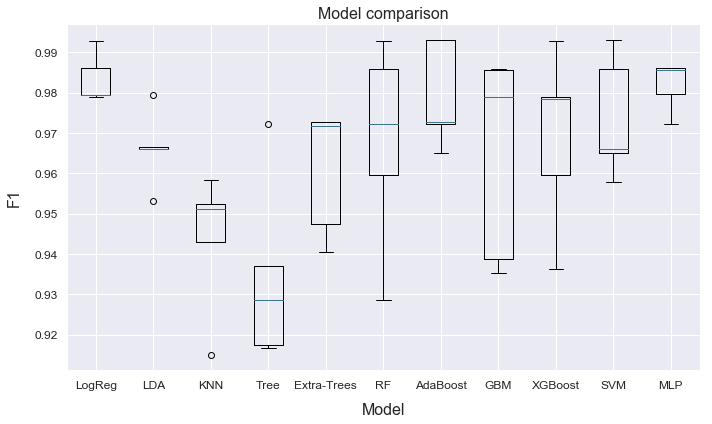

In [15]:
# Run AutoML pipeline
models = AutoML(X, Y,
                metric="f1",
                percentage=100,
                ratio=0.25,
                max_iter=15,
                batch_size=1,
                cv=True,
                n_splits=5,
                n_jobs=1,
                save_plot=None,
                verbose=0)

In [5]:
models['MLP'].best_params

{'hidden_layer_sizes': (20,),
 'alpha': 0.0,
 'learning_rate_init': 0.001,
 'max_iter': 200,
 'batch_size': 32}

In [6]:
models['GBM'].best_model

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [7]:
models['LogReg'].Precision()

0.9

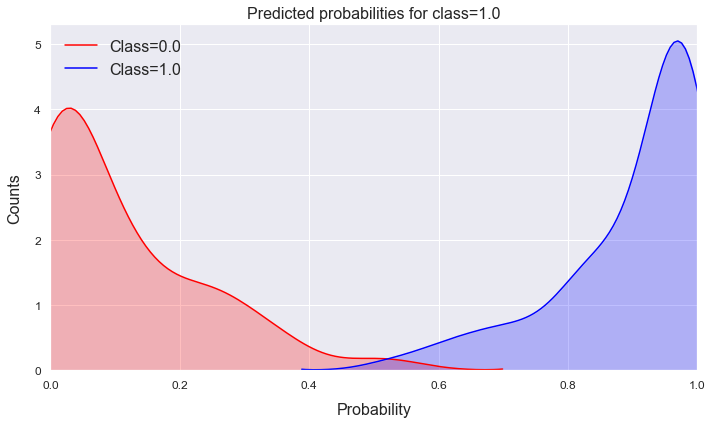

In [8]:
models['SVM'].plot_proba()

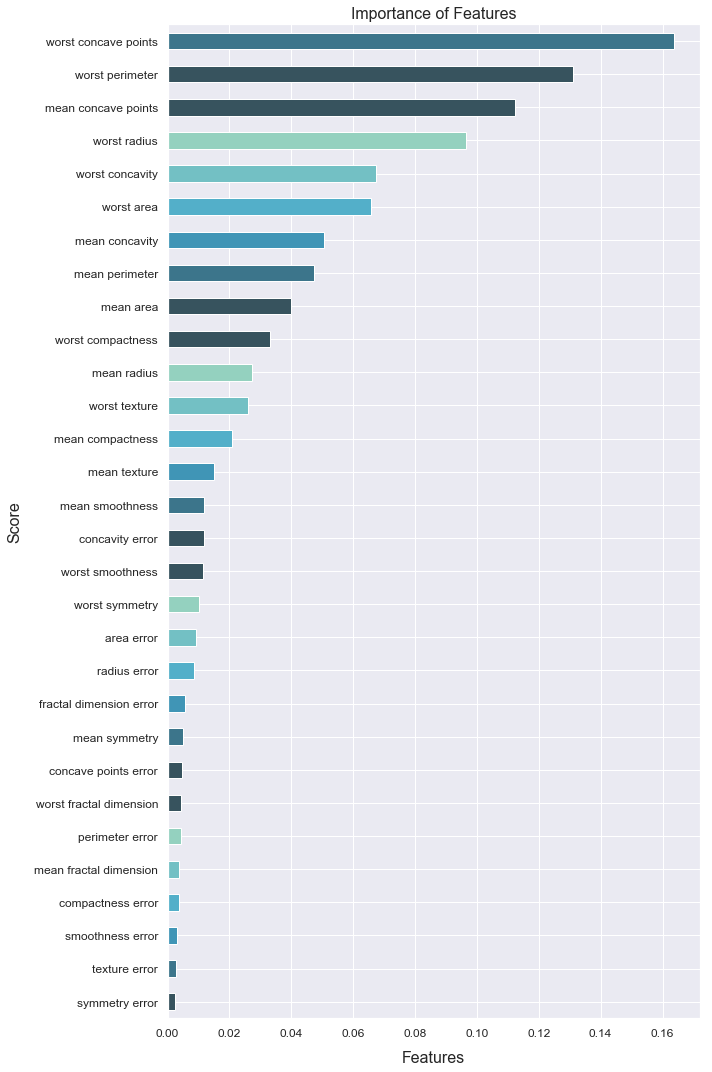

In [9]:
models['RF'].plot_feature_importance()

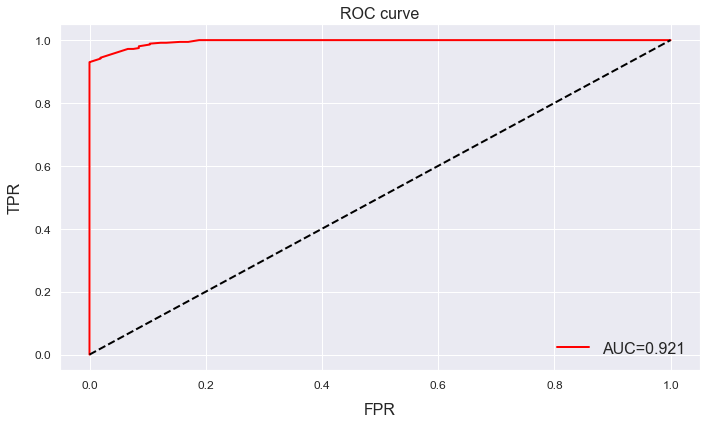

In [10]:
models['KNN'].plot_ROC()

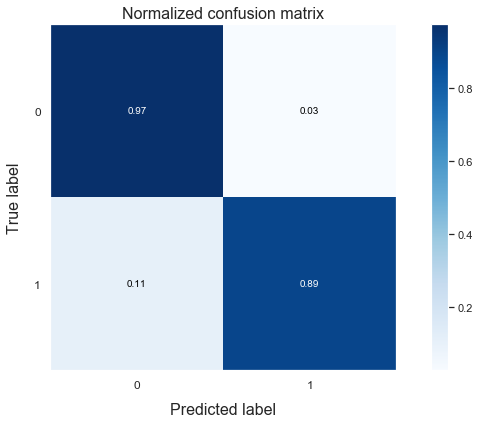

In [11]:
models['RF'].plot_confusion_matrix()

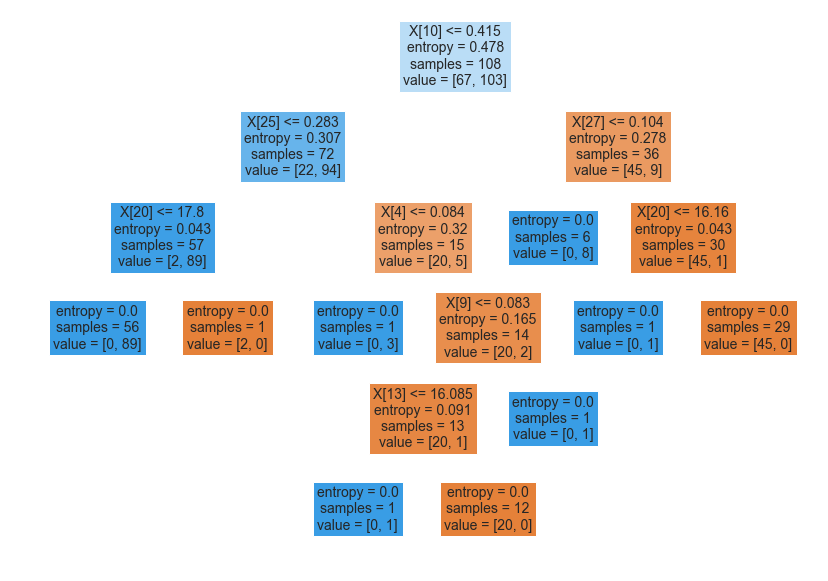

In [12]:
models['RF'].plot_decision_tree(10, rotate=False)